In [12]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [13]:
test_df = pd.read_csv("input/test.csv")
train_df = pd.read_csv("input/train.csv")

In [14]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
train_df = train_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [19]:
train_df.groupby('Embarked')['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [20]:
# Fill missing value with 'S'
ports = {"S": 0, "C": 1, "Q": 2}
train_df["Embarked"] = train_df["Embarked"].fillna("S")
train_df['Embarked'] = train_df['Embarked'].map(ports)

### Age and Sex

In [8]:
survived = 'survived'
not_survived = 'not survived'

Text(0.5,1,'Male')

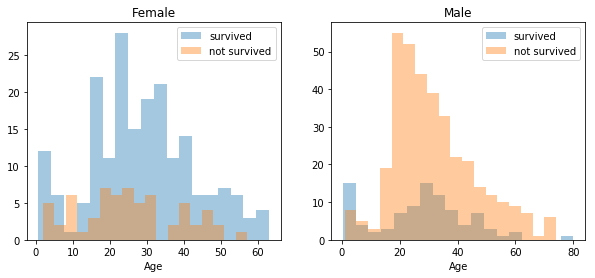

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

female = titanic_df[titanic_df['Sex'] == 'female']
ax = sns.distplot(
    female[female['Survived'] == 1].Age.dropna(),
    bins=18,
    label=survived,
    ax=axes[0],
    kde=False
)
ax = sns.distplot(
    female[female['Survived'] == 0].Age.dropna(),
    bins=18,
    label=not_survived,
    ax=axes[0],
    kde=False
)
ax.legend()
ax.set_title('Female')

male = titanic_df[titanic_df['Sex'] == 'male']
ax = sns.distplot(
    male[male['Survived'] == 1].Age.dropna(),
    bins=18,
    label=survived,
    ax=axes[1],
    kde=False
)
ax = sns.distplot(
    male[male['Survived'] == 0].Age.dropna(),
    bins=18,
    label=not_survived,
    ax=axes[1],
    kde=False
)
ax.legend()
ax.set_title('Male')

## Process the data

In [4]:
data = [train_df, test_df]

#### Age

In [20]:
for dataset in data:
    average_age_titanic   = dataset['Age'].mean()
    std_age_titanic       = dataset['Age'].std()
    count_nan_age_titanic = dataset['Age'].isnull().sum()
    rand_ = np.random.randint(
        average_age_titanic - std_age_titanic, 
        average_age_titanic + std_age_titanic, 
        size = count_nan_age_titanic
    )
    dataset['Age'][np.isnan(dataset['Age'])] = rand_
    dataset['Age'] = dataset['Age'].astype(int)
    
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

#### Embarked

In [11]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
ports = {"S": 0, "C": 1, "Q": 2}
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")
    dataset['Embarked'] = dataset['Embarked'].map(ports)

#### Fare

In [14]:
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

#### Name

In [15]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

#### Sex

In [19]:
genders = {"male": 0, "female": 1}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

#### Drop the unused features

In [22]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [23]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')